In [1]:
import numpy as np
from numpy import random as rnd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from utils import*

import dill

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
dill.load_session("session.plk")

In [16]:
def show_test_results(y_pred):
    print("Accuracy on test: ", accuracy_score(y_pred, y_test))
    xs, ys = get_wrong_pred(y_pred, y_test, x_test)
    show_data(xs, ys, dpi=60)

In [ ]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [2]:
#split data according MNIST specification
x_train, x_test = np.split(x, [60000])
y_train, y_test = np.split(y.astype(int), [60000])

# 1. Logistic Regression

In [2]:
parameters = { "C": (0.1, 1, 10)}
logreg_search = GridSearchCV(LogisticRegression(penalty="l2", n_jobs=4, max_iter=100, solver="saga"), parameters, n_jobs=4, cv=3)
logreg = make_pipeline(StandardScaler(), logreg_search)
logreg.fit(x_train, y_train)
y_pred4 = logreg.predict(x_test)

y_pred1 = logreg.predict(x_test);

C:\Users\goglo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on test:  0.9222
{'C': 0.1}


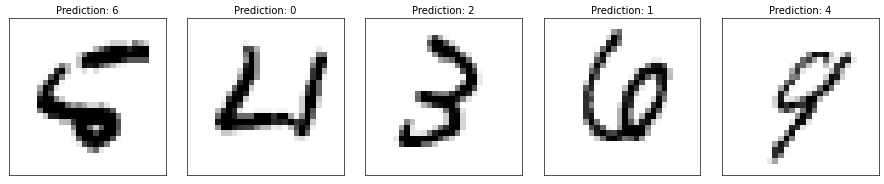

In [4]:
show_test_results(y_pred1)
print(logreg_search.best_params_)

# 2. KNN

In [2]:
parameters = {"n_neighbors": (5, 2, 8)}
knn = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=4, cv=3, verbose=2)
knn.fit(x_train, y_train)

y_pred2 = knn.predict(x_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


Accuracy on test:  0.9688
{'n_neighbors': 5}


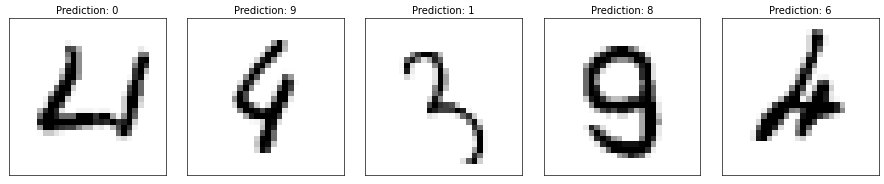

In [4]:
show_test_results(y_pred2)
print(knn.best_params_)

# 3. SVM

In [50]:
parameters = { "C": (0.1, 1, 10)}
svmlin_search = GridSearchCV(LinearSVC(max_iter=500), parameters, n_jobs=4, cv=3)
svmlin = make_pipeline(StandardScaler(), svmlin_search)
svmlin.fit(x_train, y_train)
y_pred4 = svmlin.predict(x_test)

C:\Users\goglo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy on test:  0.9131
{'C': 0.1}


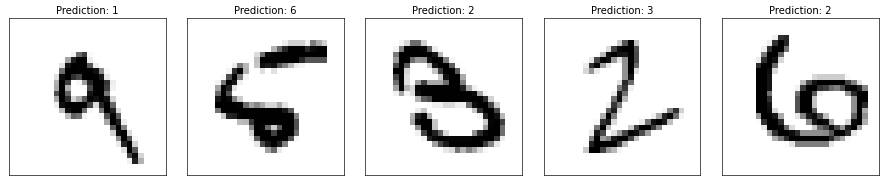

In [51]:
show_test_results(y_pred4)
print(svmlin_search.best_params_)

In [54]:
svm = SVC(max_iter=500, degree=9)
parameters = { "C": (1, 10), "kernel": ("poly", "rbf")}

svm_search = GridSearchCV(estimator=svm, param_grid=parameters, n_jobs=4,verbose=2)
svm_search.fit(x_train, y_train)
y_pred5 = svm_search.predict(x_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\goglo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy on test:  0.9843
{'C': 10, 'kernel': 'rbf'}


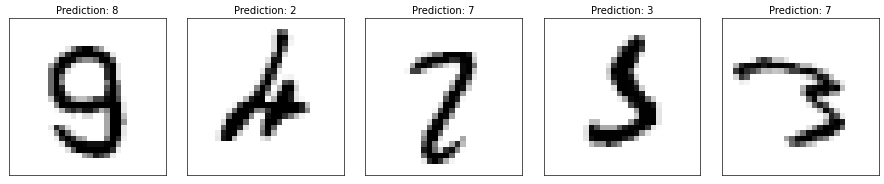

In [23]:
show_test_results(y_pred5)
print(svm_search.best_params_)

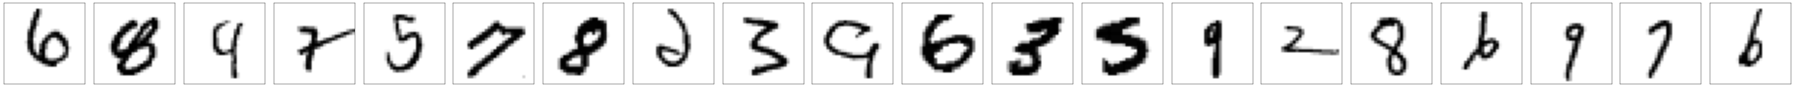

In [24]:
"Number of support vectors: {0}".format(svm_search.best_estimator_.support_vectors_.shape[0])

support_vectors = svm_search.best_estimator_.support_vectors_.copy()
gen = rnd.RandomState(0)
gen.shuffle(support_vectors)
show_data(support_vectors, dpi=30, number=20)

# 4. Decision Tree

In [27]:
parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), "max_depth": (None, 30, 50)}
dtree_search = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, cv=3, verbose=2)
dtree_search.fit(x_train, y_train)

y_pred6 = dtree_search.predict(x_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Accuracy on test:  0.8877
{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}


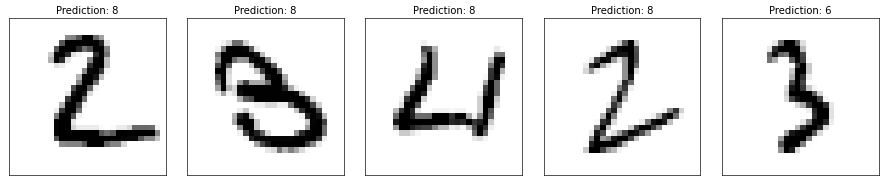

In [3]:
show_test_results(y_pred6)
print(dtree_search.best_params_)

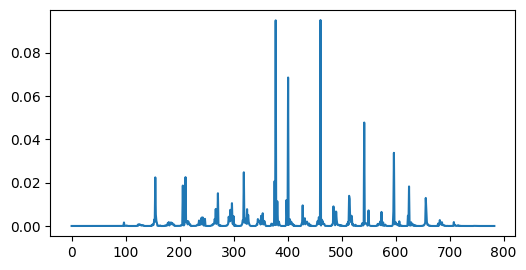

In [4]:
feauture_imp = dtree_search.best_estimator_.feature_importances_

plt.figure(figsize=(6, 3), dpi=100)
plt.plot(feauture_imp);

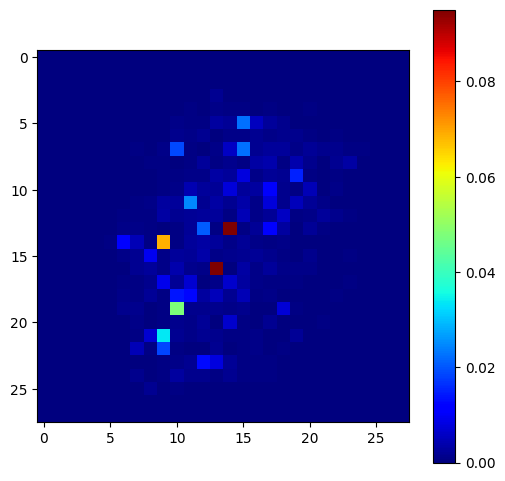

In [17]:
plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(feauture_imp.reshape(28, 28), cmap="jet")
plt.colorbar()

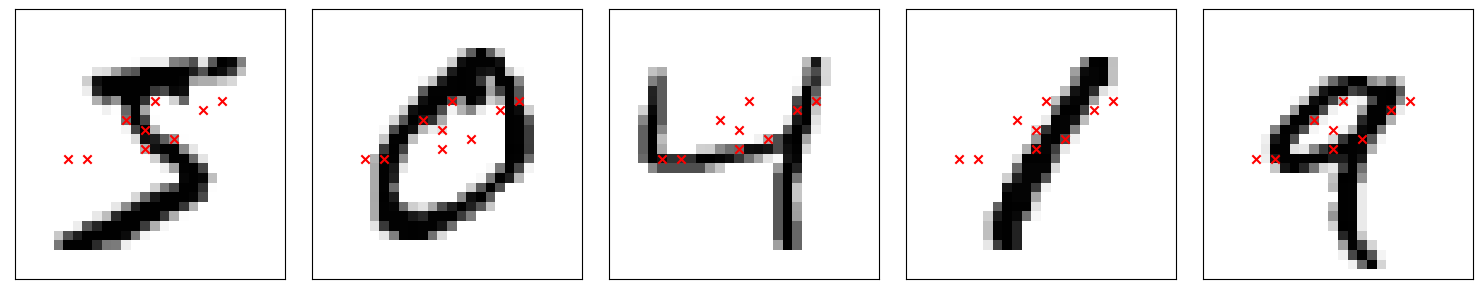

In [18]:
important_indx = np.arange(0, x.shape[1])[feauture_imp > 0.02]
show_data(x, number=5, highlight_pixeles=important_indx, dpi=100, marker='x', c='r')

In [29]:
dill.dump_session("session.plk")